In [14]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from numpy.linalg import inv
from sklearn.metrics import accuracy_score
from scipy.stats import norm
import math
import matplotlib.pyplot as plt

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
data_optdigits = pd.read_csv('optdigits/archive/optdigits.csv')
data_pageblocks = pd.read_csv('page-blocks/archive/page-blocks.csv')
data_satimage = pd.read_csv('satimage_csv.csv')
data_segment = pd.read_csv('segment_csv.csv')

In [55]:
data_optdigits.describe()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,input56,input57,input58,input59,input60,input61,input62,input63,input64,class
count,5620.0,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,...,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000
mean,0.0,0.302135,5.393238,11.815480,11.578292,5.593772,1.379359,0.138256,0.003203,1.971174,...,0.166904,0.000356,0.281851,5.760498,11.989680,11.572420,6.720819,2.093594,0.254093,4.495196
std,0.0,0.879962,4.672719,4.255952,4.462546,5.631149,3.356633,1.046998,0.090423,3.098815,...,0.843455,0.018863,0.929969,5.021145,4.347542,4.975675,5.815564,4.047959,1.418558,2.868131
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,5.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,10.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,15.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,5.000000,16.000000,...,13.000000,1.000000,10.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [56]:
data_pageblocks.describe()

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
count,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000
mean,10.473232,89.568244,1198.405628,13.753977,0.368642,0.785053,6.219278,365.930751,741.108167,106.662891,1.202631
std,18.960564,114.721758,4849.376950,30.703737,0.177757,0.170661,69.079021,1270.333082,1881.504302,167.308362,0.721470
min,1.000000,1.000000,7.000000,0.007000,0.052000,0.062000,1.000000,7.000000,7.000000,1.000000,1.000000
25%,7.000000,17.000000,114.000000,2.143000,0.261000,0.679000,1.610000,42.000000,95.000000,17.000000,1.000000
50%,8.000000,41.000000,322.000000,5.167000,0.337000,0.803000,2.070000,108.000000,250.000000,49.000000,1.000000
75%,10.000000,107.000000,980.000000,13.625000,0.426000,0.927000,3.000000,284.000000,718.000000,126.000000,1.000000
max,804.000000,553.000000,143993.000000,537.000000,1.000000,1.000000,4955.000000,33017.000000,46133.000000,3212.000000,5.000000


In [58]:
data_satimage.head()

,Aattr,Battr,Cattr,Dattr,Eattr,Fattr,A1attr,B2attr,C3attr,D4attr,...,D22attr,E23attr,F24attr,A25attr,B26attr,C27attr,D28attr,E29attr,F30attr,class
0,0.117596,1.241362,1.184036,0.815302,-0.158561,1.256483,1.193546,0.818486,-0.141965,0.879481,...,0.807707,-0.069968,1.219160,1.250463,0.597678,-0.054291,1.233342,1.262255,0.603258,1
1,-1.205362,-1.249654,-0.077532,0.444886,-0.895959,-0.447579,-0.786760,-0.554203,-0.364672,0.092157,...,-0.192752,-0.736996,-0.969292,-0.844805,-0.400030,-0.725852,-0.344432,-0.594534,-0.183967,5
2,0.779075,0.148811,0.042617,-0.243030,0.800057,0.164136,0.053370,-0.448612,0.154978,-0.345245,...,-0.877277,0.671174,-0.006373,-0.425752,-0.662584,0.691889,0.356801,-0.175259,-0.236449,7
3,1.146564,0.585831,0.342991,0.021553,0.947536,0.601074,0.353416,0.026550,1.788164,1.010702,...,0.281150,1.412317,1.044084,0.532085,0.282612,1.438068,1.058033,0.842981,0.130923,3
4,-0.764376,-1.162250,-0.137607,0.180303,-0.969698,-1.146681,-0.126658,0.184937,-0.735851,-1.132569,...,-0.192752,-0.885225,-1.231906,-0.784941,-0.347519,-0.875088,-1.220973,-0.774223,-0.551339,5


In [54]:
data_segment.describe()

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean
count,2310.000000,2310.000000,2310.0,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2.310000e+03,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000
mean,124.913853,123.417316,9.0,0.014334,0.004714,1.893940,5.709320,2.424723,8.243692e+00,37.051595,32.821309,44.187877,34.145601,-12.690860,21.408850,-8.717989,45.137468,0.426893,-1.362897
std,72.956532,57.483851,0.0,0.040154,0.024234,2.698909,44.846453,3.610083,5.881153e+01,38.176410,35.036776,43.527458,36.364774,11.583561,19.571819,11.551628,42.921761,0.228309,1.545336
min,1.000000,11.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.589460e-08,0.000000,0.000000,0.000000,0.000000,-49.666700,-12.444400,-33.888900,0.000000,0.000000,-3.044180
25%,62.000000,81.000000,9.0,0.000000,0.000000,0.722221,0.355555,0.777780,4.216372e-01,7.296300,7.000000,9.555560,6.027778,-18.555600,4.138888,-16.777800,11.555600,0.284235,-2.188057
50%,121.000000,122.000000,9.0,0.000000,0.000000,1.222220,0.833333,1.444440,9.629630e-01,21.592600,19.555600,27.666700,20.333300,-10.888900,19.666700,-10.888900,28.666700,0.374803,-2.051200
75%,189.000000,172.000000,9.0,0.000000,0.000000,2.166670,1.806370,2.555560,2.183272e+00,53.213000,47.333300,64.888900,46.500025,-4.222220,35.777800,-3.222220,64.888900,0.540123,-1.562305
max,254.000000,251.000000,9.0,0.333333,0.222222,29.222200,991.718000,44.722200,1.386330e+03,143.444000,137.111000,150.889000,142.556000,9.888890,82.000000,24.666700,150.889000,1.000000,2.912480


## Definition Xapp, Xtst, Zapp, Ztst, zapp, ztst

### zapp is binary class indicators

In [19]:
from sklearn.model_selection import train_test_split
def train_test(data):
    
    Z = data['class']
    X = data.drop(columns=['class'])
    Xapp, Xtst, Zapp, Ztst = train_test_split(X, Z, test_size=0.3, random_state=0)
        # print(Y_train)
    train = pd.concat([Zapp, Xapp], axis=1)
    test = pd.concat([Ztst, Xtst], axis=1)

    Xapp =Xapp.values
    Xtst =Xtst.values
    Zapp =Zapp.values
    Ztst =Ztst.values

    lb = preprocessing.LabelBinarizer()
    zapp = lb.fit_transform(Zapp)
    ztst = lb.fit_transform(Ztst)
    
    return[Xapp,Xtst,Zapp,Ztst,zapp,ztst]

### Scale dataset 

In [20]:
from sklearn.model_selection import train_test_split
def train_test_scale(data):
    
    Z = data['class']
    X = preprocessing.scale(data.drop(['class'],axis = 1))
    Xapp, Xtst, Zapp, Ztst = train_test_split(X, Z, test_size=0.3, random_state=0)
    print(type(Xapp))
        # print(Y_train)

    lb = preprocessing.LabelBinarizer()
    zapp = lb.fit_transform(Zapp)
    ztst = lb.fit_transform(Ztst)
    
    return[Xapp,Xtst,Zapp,Ztst,zapp,ztst]

## Definition n, d, p, K, mprior, Sprior, df_exp, df_cov 

In [21]:
def coef(Xapp,Zapp):
    
    n = Xapp.shape[0]
    d = Xapp.shape[1]
    p = Xapp.shape[1]
    lb = preprocessing.LabelBinarizer()
    lb.fit(Zapp)
    K = len(lb.classes_)

    mprior = np.zeros((K,p),dtype = float)
    Sprior = np.zeros((p,p,K),dtype = float)
    for i in range(0,K):
        Sprior_k = np.eye(p)
        Sprior[:,:,i] = Sprior_k

    df_exp = 1
    df_cov = d+1
    return[n,d,p,K,mprior,Sprior,df_exp,df_cov]

## Definition pi, mu, sig

In [22]:

def params(Xapp,zapp,p,K,df_exp,mprior,Sprior,df_cov):
    #Calculate pi 1*K
    pi = np.zeros((1,K))
    len_zapp = Xapp.shape[0]
    for i in range(0,K):
        pi[:,i] = np.sum(zapp[:,i]) / len_zapp
        
   #Calculate mu K*p
    mu = np.zeros((K,p))

    for k in range(0, K):
        nk = np.sum(zapp[:,k])
        Xk = Xapp[np.argwhere(zapp[:,k]!=0).reshape(-1)]
        mu[k,:] = (np.sum(Xk,axis = 0)+df_exp*mprior[k,:])/(nk+df_exp)
        
    #Calculate sig p*p*K
    sig = np.zeros((p, p, K),dtype = float)
    for i in range(0,K):
        sig_k = np.zeros((p, p))

        A = mu[i,:] - mprior[i,:]

        nk = np.sum(zapp[:,i])
        B = np.cov(Xapp[np.argwhere(zapp[:,i]!=0).reshape(-1)].T)       

        sig_k = (nk*B + df_exp*A.reshape(-1,1)*A + inv(Sprior[:,:,i]))/(nk + df_cov + p +2)
        sig[:,:,i] = sig_k  
    
    return[pi,mu,sig]

## Prediction and calculate the prob and pred

In [23]:
from sklearn.preprocessing import LabelBinarizer

def prediction(Xtst,mu,sig,pi,K,p):
    prob = np.zeros((len(Xtst),K))
    fk_x = np.zeros((1,K))
    pred_binary = np.zeros((len(Xtst),K))

    for n in range(0,len(Xtst)):
        fx = np.zeros((1,K))
        pi_fk_x = np.zeros((1,K))
        for i in range(0,K):

            B=(Xtst[n,:]-mu[i,:])
            n_tst_k = len(Xtst)
            sig_sqrt = 1/ np.sqrt(np.linalg.norm(sig[:,:,i]))
    #         c =  B.reshape(-1,1) * B * inv(sig[:,:,i])             
            c =np.dot( B.reshape(-1,1) * B,inv(sig[:,:,i]))
            exp = np.exp((-1/2) * c.trace())

            const = 1 /math.pow( (2*math.pi), p/2 )
            a = const * sig_sqrt*exp 
            fk_x[:,i] = a
            pi_fk_x[:,i] = pi[:,i]*fk_x[:,i]

            fx += pi[:,i]*fk_x[:,i]

        prob[n,:] = pi_fk_x/fx
        pred_binary[n,np.argwhere(prob[n,:]==np.max(prob[n,:])).reshape(-1,1)]=1
    
    
    lb = preprocessing.LabelBinarizer()
#    pred = lb.inverse_transform(pred_binary)

    return[prob, pred_binary]

### Calculate the results

In [25]:
Xapp_opt,Xtst_opt,Zapp_opt,Ztst_opt,zapp_opt ,ztst_opt= train_test(data_optdigits)
Xapp_pag,Xtst_pag,Zapp_pag,Ztst_pag,zapp_pag,ztst_pag = train_test(data_pageblocks)
Xapp_sat,Xtst_sat,Zapp_sat,Ztst_sat,zapp_sat,ztst_sat = train_test(data_satimage)
Xapp_seg,Xtst_seg,Zapp_seg,Ztst_seg,zapp_seg,ztst_seg = train_test(data_segment)

n_opt,d_opt,p_opt,K_opt,mprior_opt,Sprior_opt,df_exp_opt,df_cov_opt = coef(Xapp_opt,Zapp_opt)
n_pag,d_pag,p_pag,K_pag,mprior_pag,Sprior_pag,df_exp_pag,df_cov_pag = coef(Xapp_pag,Zapp_pag)
n_sat,d_sat,p_sat,K_sat,mprior_sat,Sprior_sat,df_exp_sat,df_cov_sat = coef(Xapp_sat,Zapp_sat)
n_seg,d_seg,p_seg,K_seg,mprior_seg,Sprior_seg,df_exp_seg,df_cov_seg = coef(Xapp_seg,Zapp_seg)

pi_opt,mu_opt,sig_opt = params(Xapp_opt,zapp_opt,p_opt,K_opt,df_exp_opt,mprior_opt,Sprior_opt,df_cov_opt) 
pi_pag,mu_pag,sig_pag = params(Xapp_pag, zapp_pag, p_pag, K_pag,df_exp_pag,mprior_pag,Sprior_pag,df_cov_pag) 
pi_sat,mu_sat,sig_sat = params(Xapp_sat, zapp_sat, p_sat, K_sat,df_exp_sat,mprior_sat,Sprior_sat,df_cov_sat) 
pi_seg,mu_seg,sig_seg = params(Xapp_seg, zapp_seg, p_seg, K_seg,df_exp_seg,mprior_seg,Sprior_seg,df_cov_seg)
#print('pi_opt : ', pi_opt,'mu_opt : ',mu_opt,'sig_opt : ',sig_opt)
#print('pi_pag : ', pi_pag,'mu_pag : ',mu_pag,'sig_pag : ',sig_pag)
#print('pi_sat : ', pi_sat,'mu_sat : ',mu_sat,'sig_sat : ',sig_sat)
#print('pi_seg : ', pi_seg,'mu_seg : ',mu_seg,'sig_seg : ',sig_seg)

prob_opt, pred_opt = prediction(Xtst_opt,mu_opt,sig_opt,pi_opt,K_opt,p_opt)
prob_pag, pred_pag = prediction(Xtst_pag,mu_pag,sig_pag,pi_pag,K_pag,p_pag)
prob_sat, pred_sat = prediction(Xtst_sat,mu_sat,sig_sat,pi_sat,K_sat,p_sat)
prob_seg, pred_seg = prediction(Xtst_seg,mu_seg,sig_seg,pi_seg,K_seg,p_seg)

### Scale the dataset

In [13]:
Xapp_opt_scale,Xtst_opt_scale,Zapp_opt_scale,Ztst_opt_scale,zapp_opt_scale,ztst_opt_scale = train_test_scale(data_optdigits)
n_opt_scale,d_opt_scale,p_opt_scale,K_opt_scale,mprior_opt_scale,Sprior_opt_scale,df_exp_opt_scale,df_cov_opt_scale = coef(Xapp_opt_scale,Zapp_opt_scale)
pi_opt_scale,mu_opt_scale,sig_opt_scale = params(Xapp_opt_scale, zapp_opt_scale, p_opt_scale, K_opt_scale,df_exp_opt_scale,mprior_opt_scale,Sprior_opt_scale,df_cov_opt_scale)
prob_opt_scale, pred_opt_scale = prediction(Xtst_opt_scale,mu_opt_scale,sig_opt_scale,pi_opt_scale,K_opt_scale,p_opt_scale)

Xapp_pag_scale,Xtst_pag_scale,Zapp_pag_scale,Ztst_pag_scale,zapp_pag_scale,ztst_pag_scale = train_test_scale(data_pageblocks)
n_pag_scale,d_pag_scale,p_pag_scale,K_pag_scale,mprior_pag_scale,Sprior_pag_scale,df_exp_pag_scale,df_cov_pag_scale = coef(Xapp_pag_scale,Zapp_pag_scale)
pi_pag_scale,mu_pag_scale,sig_pag_scale = params(Xapp_pag_scale, zapp_pag_scale, p_pag_scale, K_pag_scale,df_exp_pag_scale,mprior_pag_scale,Sprior_pag_scale,df_cov_pag_scale)
prob_pag_scale, pred_pag_scale = prediction(Xtst_pag_scale,mu_pag_scale,sig_pag_scale,pi_pag_scale,K_pag_scale,p_pag_scale)

Xapp_sat_scale,Xtst_sat_scale,Zapp_sat_scale,Ztst_sat_scale,zapp_sat_scale,ztst_sat_scale = train_test_scale(data_satimage)
n_sat_scale,d_sat_scale,p_sat_scale,K_sat_scale,mprior_sat_scale,Sprior_sat_scale,df_exp_sat_scale,df_cov_sat_scale = coef(Xapp_sat_scale,Zapp_sat_scale)
pi_sat_scale,mu_sat_scale,sig_sat_scale = params(Xapp_sat_scale, zapp_sat_scale, p_sat_scale, K_sat_scale,df_exp_sat_scale,mprior_sat_scale,Sprior_sat_scale,df_cov_sat_scale)
prob_sat_scale, pred_sat_scale = prediction(Xtst_sat_scale,mu_sat_scale,sig_sat_scale,pi_sat_scale,K_sat_scale,p_sat_scale)

Xapp_seg_scale,Xtst_seg_scale,Zapp_seg_scale,Ztst_seg_scale,zapp_seg_scale,ztst_seg_scale = train_test_scale(data_segment)
n_seg_scale,d_seg_scale,p_seg_scale,K_seg_scale,mprior_seg_scale,Sprior_seg_scale,df_exp_seg_scale,df_cov_seg_scale = coef(Xapp_seg_scale,Zapp_seg_scale)
pi_seg_scale,mu_seg_scale,sig_seg_scale = params(Xapp_seg_scale, zapp_seg_scale, p_seg_scale, K_seg_scale,df_exp_seg_scale,mprior_seg_scale,Sprior_seg_scale,df_cov_seg_scale)
prob_seg_scale, pred_seg_scale = prediction(Xtst_seg_scale,mu_seg_scale,sig_seg_scale,pi_seg_scale,K_seg_scale,p_seg_scale)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [14]:
acc_opt = accuracy_score(ztst_opt,pred_opt)
print('Accuracy for optdigits: ',acc_opt)
acc_opt_scal = accuracy_score(ztst_opt_scale,pred_opt_scale)
print('Accuracy for optdigits after scaling: ',acc_opt_scal)

acc_pag = accuracy_score(ztst_pag,pred_pag)
print('Accuracy for pagblocks: ',acc_pag)
acc_pag_scal = accuracy_score(ztst_pag_scale,pred_pag_scale)
print('Accuracy for pageblocks after scaling : ',acc_pag_scal )

acc_sat = accuracy_score(ztst_sat,pred_sat)
print('Accuracy for satimage: ',acc_sat)
acc_sat_scal = accuracy_score(ztst_sat_scale,pred_sat_scale)
print('Accuracy for satimage after scaling : ',acc_sat_scal)

acc_seg = accuracy_score(ztst_seg,pred_seg)
print('Accuracy for segment: ',acc_seg)
acc_seg_scal = accuracy_score(ztst_seg_scale,pred_seg_scale)
print('Accuracy for segment after scaling: ',acc_seg_scal)


Accuracy for optdigits:  0.9715302491103203
Accuracy for optdigits after scaling:  0.9733096085409253
Accuracy for pagblocks:  0.9299634591961023
Accuracy for pageblocks after scaling :  0.9299634591961023
Accuracy for satimage:  0.8299637117677553
Accuracy for satimage after scaling :  0.8299637117677553
Accuracy for segment:  0.9134199134199135
Accuracy for segment after scaling:  0.924963924963925


### The number of sampling, feature and class 

In [26]:
print('n_opt: ', n_opt, '   p_opt: ',p_opt,  '  K_opt: ',K_opt)
print('n_pag: ', n_pag, '   p_pag: ',p_pag, '  K_pag: ',K_pag)
print('n_sat: ', n_sat, '   p_sat: ',p_sat, '  K_sat: ',K_sat)
print('n_seg: ', n_seg, '   p_seg: ',p_seg, '  K_seg: ',K_seg)

n_opt:  3934    p_opt:  64   K_opt:  10
n_pag:  3831    p_pag:  10   K_pag:  5
n_sat:  4501    p_sat:  36   K_sat:  6
n_seg:  1617    p_seg:  19   K_seg:  7


## Without proir by using the model QDA

In [15]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda =QuadraticDiscriminantAnalysis()
qda.fit(Xapp_opt, Zapp_opt)
prediction_qda_opt = qda.predict(Xtst_opt)
acc_qda_opt = accuracy_score(Ztst_opt,prediction_qda_opt)
print(acc_qda_opt)

0.7864768683274022


In [16]:
qda.fit(Xapp_pag, Zapp_pag)
prediction_qda_pag = qda.predict(Xtst_pag)
acc_qda_pag = accuracy_score(Ztst_pag,prediction_qda_pag)
print(acc_qda_pag)

0.940925700365408


In [17]:
qda.fit(Xapp_sat, Zapp_sat)
prediction_qda_sat = qda.predict(Xtst_sat)
acc_qda_sat = accuracy_score(Ztst_sat,prediction_qda_sat)
print(acc_qda_sat)

0.8517366511145671


In [18]:
qda.fit(Xapp_seg, Zapp_seg)
prediction_qda_seg = qda.predict(Xtst_seg)
acc_qda_seg = accuracy_score(Ztst_seg,prediction_qda_seg)
print(acc_qda_seg)

0.70995670995671


## Visualize the results

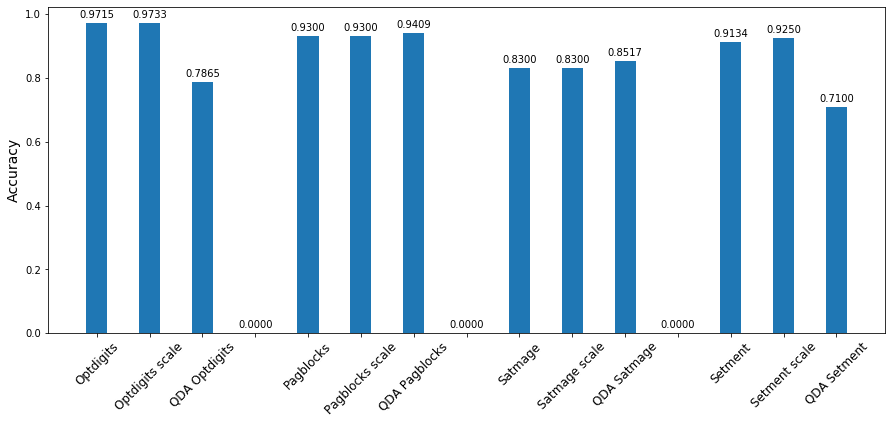

In [20]:
import pylab as pl
acc=[acc_opt,acc_opt_scal,acc_qda_opt, 0, acc_pag,acc_pag_scal,acc_qda_pag,0, acc_sat,acc_sat_scal,acc_qda_sat,0, acc_seg,acc_seg_scal,acc_qda_seg]#各变量IV
#print(ivlist)
index=['Optdigits','Optdigits scale','QDA Optdigits','   ','Pagblocks','Pagblocks scale','QDA Pagblocks','   ','Satmage','Satmage scale','QDA Satmage','   ','Setment','Setment scale','QDA Setment']#x轴的标签
#fig1 = plt.figure(1)
fig1 = plt.figure(figsize = (15,6))
ax1 = fig1.add_subplot(1, 1, 1)
x = np.arange(len(index))+1
ax1.bar(x, acc,  width=0.4) 
ax1.set_xticks(x)
ax1.set_xticklabels(index, rotation=45, fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=14)

for a, b in zip(x, acc):
    plt.text(a, b + 0.01, '%.4f' % b, ha='center', va='bottom', fontsize=10)
plt.show()

## Test df_exp 

### df_exp = 1, 0.001, 0.01, 0.1, 0.2, 0.5, 10, 100 (df_exp > 0)

### Accuracy for Optdigits of different df_exp

In [72]:
def test_df_exp(data,df_exp_change):
#    pred = np.zeros(()
    Xapp,Xtst,Zapp,Ztst,zapp,ztst = train_test(data)
    n,d,p,K,mprior,Sprior,df_exp,df_cov = coef(Xapp,Zapp)
    pi,mu,sig = params(Xapp, zapp, p, K,df_exp_change,mprior,Sprior,df_cov)
    prob, pred = prediction(Xtst,mu,sig,pi,K,p)
    
    acc = accuracy_score(ztst,pred)
    return[acc]

In [74]:
# OPTDIGITS df_exp = 1
acc_opt = test_df_exp(data_optdigits,1)
print('Accuracy for optdigits df_exp = 1: ',acc_opt[0])

# OPTDIGITS df_exp = 0.001
acc_opt_exp001 = test_df_exp(data_optdigits,0.001)
print('Accuracy for optdigits df_exp = 0.001: ',acc_opt_exp001[0] )

# OPTDIGITS df_exp = 0.01
acc_opt_exp01 = test_df_exp(data_optdigits,0.01)
print('Accuracy for optdigits df_exp = 0.01: ',acc_opt_exp01[0] )

# OPTDIGITS df_exp = 0.1
acc_opt_exp1 = test_df_exp(data_optdigits,0.1)
print('Accuracy for optdigits df_exp = 0.1: ',acc_opt_exp1[0] )

# OPTDIGITS df_exp = 0.2
acc_opt_exp2 = test_df_exp(data_optdigits,0.2)
print('Accuracy for optdigits df_exp = 0.2: ',acc_opt_exp2[0] )

# OPTDIGITS df_exp = 0.5
acc_opt_exp5 = test_df_exp(data_optdigits,0.5)
print('Accuracy for optdigits df_exp = 0.5: ',acc_opt_exp5[0] )

# OPTDIGITS df_exp = 10
acc_opt_exp10 = test_df_exp(data_optdigits,10)
print('Accuracy for optdigits df_exp = 10: ',acc_opt_exp10[0] )

# OPTDIGITS df_exp = 100
acc_opt_exp100 = test_df_exp(data_optdigits,100)
print('Accuracy for optdigits df_exp = 100: ',acc_opt_exp100[0] )


Accuracy for optdigits df_exp = 1:  0.9715302491103203
Accuracy for optdigits df_exp = 0.001:  [0.9715302491103203]
Accuracy for optdigits df_exp = 0.01:  [0.9715302491103203]
Accuracy for optdigits df_exp = 0.1:  [0.9715302491103203]
Accuracy for optdigits df_exp = 0.2:  [0.9715302491103203]
Accuracy for optdigits df_exp = 0.5:  [0.9715302491103203]
Accuracy for optdigits df_exp = 10:  [0.970344009489917]
Accuracy for optdigits df_exp = 100:  [0.970344009489917]


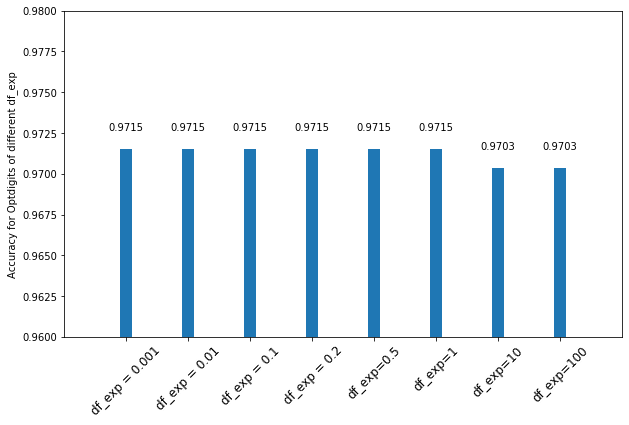

In [76]:
import pylab as pl
acc_opt_exp=[acc_opt_exp001[0],acc_opt_exp01[0],acc_opt_exp1[0],acc_opt_exp2[0],acc_opt_exp5[0],acc_opt[0], acc_opt_exp10[0],acc_opt_exp100[0]]
#round(acc_opt_exp, 4)
index=['df_exp = 0.001','df_exp = 0.01','df_exp = 0.1',' df_exp = 0.2','df_exp=0.5','df_exp=1','df_exp=10','df_exp=100']#x轴的标签
#fig1 = plt.figure(1)
fig1 = plt.figure(figsize = (10,6))
ax1 = fig1.add_subplot(1, 1, 1)
x = np.arange(len(index))+1

plt.axis([0, 9, 0.96, 0.98])

ax1.bar(x, acc_opt_exp,  width=0.2) 
ax1.set_xticks(x)
ax1.set_xticklabels(index, rotation=45, fontsize=12)

ax1.set_ylabel('Accuracy for Optdigits of different df_exp', fontsize=10)

for a, b in zip(x, acc_opt_exp):
    plt.text(a, b + 0.001, '%.4f' % b, ha='center', va='bottom', fontsize=10)
plt.show()

### Accuracy for Pagblocks of different df_exp

In [77]:
# PAGEBLOCKS df_exp = 1
acc_pag = test_df_exp(data_pageblocks,1)
print('Accuracy for pageblocks df_exp = 1: ',acc_pag[0])

# PAGEBLOCKS df_exp = 0.001
acc_pag_exp001 = test_df_exp(data_pageblocks,0.001)
print('Accuracy for pageblocks df_exp = 0.001: ',acc_pag_exp001[0] )

# PAGEBLOCKSdf_exp = 0.01
acc_pag_exp01 = test_df_exp(data_pageblocks,0.01)
print('Accuracy for pageblocks df_exp = 0.01: ',acc_pag_exp01[0] )

# PAGEBLOCKS df_exp = 0.1
acc_pag_exp1 = test_df_exp(data_pageblocks,0.1)
print('Accuracy for pageblocks df_exp = 0.1: ',acc_pag_exp1[0] )

# PAGEBLOCKS df_exp = 0.2
acc_pag_exp2 = test_df_exp(data_pageblocks,0.2)
print('Accuracy for pageblocks df_exp = 0.2: ',acc_pag_exp2[0] )

# PAGEBLOCKS df_exp = 0.5
acc_pag_exp5 = test_df_exp(data_pageblocks,0.5)
print('Accuracy for pageblocks df_exp = 0.5: ',acc_pag_exp5[0] )

# PAGEBLOCKS df_exp = 10
acc_pag_exp10 = test_df_exp(data_pageblocks,10)
print('Accuracy for pageblocks df_exp = 10: ',acc_pag_exp10[0] )

# PAGEBLOCKS df_exp = 100
acc_pag_exp100 = test_df_exp(data_pageblocks,100)
print('Accuracy for pageblocks df_exp = 100: ',acc_pag_exp100[0] )

Accuracy for pageblocks df_exp = 1:  0.9299634591961023
Accuracy for pageblocks df_exp = 0.001:  0.9311814859926918
Accuracy for pageblocks df_exp = 0.01:  0.9311814859926918
Accuracy for pageblocks df_exp = 0.1:  0.9311814859926918
Accuracy for pageblocks df_exp = 0.2:  0.9311814859926918
Accuracy for pageblocks df_exp = 0.5:  0.9305724725943971
Accuracy for pageblocks df_exp = 10:  0.9287454323995128
Accuracy for pageblocks df_exp = 100:  0.9336175395858709


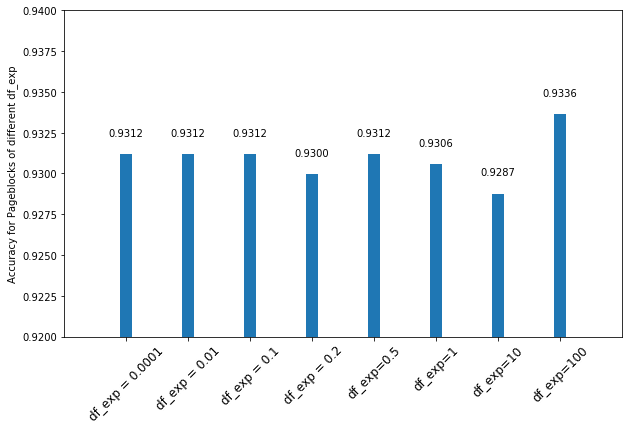

In [78]:
import pylab as pl
acc_pag_exp=[acc_pag_exp001[0],acc_pag_exp01[0],acc_pag_exp1[0],acc_pag[0],acc_pag_exp2[0],acc_pag_exp5[0], acc_pag_exp10[0],acc_pag_exp100[0]]
#round(acc_opt_exp, 4)
index=['df_exp = 0.0001','df_exp = 0.01','df_exp = 0.1',' df_exp = 0.2','df_exp=0.5','df_exp=1','df_exp=10','df_exp=100']#x轴的标签
#fig1 = plt.figure(1)
fig1 = plt.figure(figsize = (10,6))
ax1 = fig1.add_subplot(1, 1, 1)
x = np.arange(len(index))+1

plt.axis([0, 9, 0.92, 0.94])

ax1.bar(x, acc_pag_exp, width=0.2) 
ax1.set_xticks(x)
ax1.set_xticklabels(index, rotation=45, fontsize=12)

ax1.set_ylabel('Accuracy for Pageblocks of different df_exp', fontsize=10)

for a, b in zip(x, acc_pag_exp):
    plt.text(a, b + 0.001, '%.4f' % b, ha='center', va='bottom', fontsize=10)
plt.show()

### Accuracy for Satmages of different df_exp

In [81]:
# SATMAGE df_exp = 1
acc_sat = test_df_exp(data_satimage,1)
print('Accuracy for satimage df_exp = 1: ',acc_sat[0])

# SATMAGE df_exp = 0.001
acc_sat_exp001 = test_df_exp(data_satimage,0.001)
print('Accuracy for satimage df_exp = 0.001: ',acc_sat_exp001[0] )

# SATMAGE df_exp = 0.01
acc_sat_exp01 = test_df_exp(data_satimage,0.01)
print('Accuracy for satimage df_exp = 0.01: ',acc_sat_exp01[0] )

# SATMAGE df_exp = 0.1
acc_sat_exp1 = test_df_exp(data_satimage,0.1)
print('Accuracy for satimage df_exp = 0.1: ',acc_sat_exp1[0] )

# SATMAGE df_exp = 0.2
acc_sat_exp2 = test_df_exp(data_satimage,0.2)
print('Accuracy for satimage df_exp = 0.2: ',acc_sat_exp2[0] )

# SATMAGE df_exp = 0.5
acc_sat_exp5 = test_df_exp(data_satimage,0.5)
print('Accuracy for satimage df_exp = 0.5: ',acc_sat_exp5[0] )

# SATMAGE df_exp = 10
acc_sat_exp10 = test_df_exp(data_satimage,10)
print('Accuracy for satimage df_exp = 10: ',acc_sat_exp10[0] )

# SATMAGE df_exp = 100
acc_sat_exp100 = test_df_exp(data_satimage,100)
print('Accuracy for satimage df_exp = 100: ',acc_sat_exp100[0] )

Accuracy for satimage df_exp = 1:  0.8299637117677553
Accuracy for satimage df_exp = 0.001:  0.8310005184033178
Accuracy for satimage df_exp = 0.01:  0.8310005184033178
Accuracy for satimage df_exp = 0.1:  0.8310005184033178
Accuracy for satimage df_exp = 0.2:  0.8310005184033178
Accuracy for satimage df_exp = 0.5:  0.8304821150855366
Accuracy for satimage df_exp = 10:  0.8268532918610679
Accuracy for satimage df_exp = 100:  0.8123379989631934


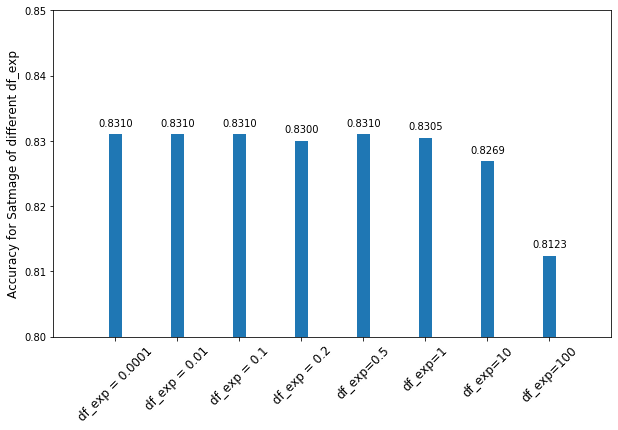

In [80]:
import pylab as pl
acc_sat_exp=[acc_sat_exp001[0] ,acc_sat_exp01[0] ,acc_sat_exp1[0] ,acc_sat[0] ,acc_sat_exp2[0] ,acc_sat_exp5[0] , acc_sat_exp10[0] ,acc_sat_exp100[0] ]
#round(acc_opt_exp, 4)
index=['df_exp = 0.0001','df_exp = 0.01','df_exp = 0.1',' df_exp = 0.2','df_exp=0.5','df_exp=1','df_exp=10','df_exp=100']#x轴的标签
#fig1 = plt.figure(1)
fig1 = plt.figure(figsize = (10,6))
ax1 = fig1.add_subplot(1, 1, 1)
x = np.arange(len(index))+1

plt.axis([0, 9, 0.8, 0.85])

ax1.bar(x, acc_sat_exp, width=0.2) #生成柱状图
ax1.set_xticks(x)
ax1.set_xticklabels(index, rotation=45, fontsize=12)

ax1.set_ylabel('Accuracy for Satmage of different df_exp', fontsize=12)
#在柱状图上添加数字标签
for a, b in zip(x, acc_sat_exp):
    plt.text(a, b + 0.001, '%.4f' % b, ha='center', va='bottom', fontsize=10)
plt.show()

### Accuracy for Segments of different df_exp

In [83]:
# SAGEMENT df_exp = 1
acc_seg = test_df_exp(data_segment,1)
print('Accuracy for segment df_exp = 1: ',acc_seg[0])

# SAGEMENT df_exp = 0.001
acc_seg_exp001 = test_df_exp(data_segment,0.001)
print('Accuracy for segment df_exp = 0.001: ',acc_seg_exp001[0] )

# SAGEMENT df_exp = 0.01
acc_seg_exp01 = test_df_exp(data_segment,0.01)
print('Accuracy for segment df_exp = 0.01: ',acc_seg_exp01[0] )

# SAGEMENT df_exp = 0.1
acc_seg_exp1 = test_df_exp(data_segment,0.1)
print('Accuracy for segment df_exp = 0.1: ',acc_seg_exp1[0] )

# SAGEMENT df_exp = 0.2
acc_seg_exp2 = test_df_exp(data_segment,0.2)
print('Accuracy for segment df_exp = 0.2: ',acc_seg_exp2[0] )

# SAGEMENT df_exp = 0.5
acc_seg_exp5 = test_df_exp(data_segment,0.5)
print('Accuracy for segment df_exp = 0.5: ',acc_seg_exp5[0] )

# SAGEMENT df_exp = 10
acc_seg_exp10 = test_df_exp(data_segment,10)
print('Accuracy for segment df_exp = 10: ',acc_seg_exp10[0] )

# SAGEMENT df_exp = 100
acc_seg_exp100 = test_df_exp(data_segment,100)
print('Accuracy for segment df_exp = 100: ',acc_seg_exp100[0] )

Accuracy for segment df_exp = 1:  0.9134199134199135
Accuracy for segment df_exp = 0.001:  0.9134199134199135
Accuracy for segment df_exp = 0.01:  0.9134199134199135
Accuracy for segment df_exp = 0.1:  0.9134199134199135
Accuracy for segment df_exp = 0.2:  0.9134199134199135
Accuracy for segment df_exp = 0.5:  0.9134199134199135
Accuracy for segment df_exp = 10:  0.911976911976912
Accuracy for segment df_exp = 100:  0.9105339105339105


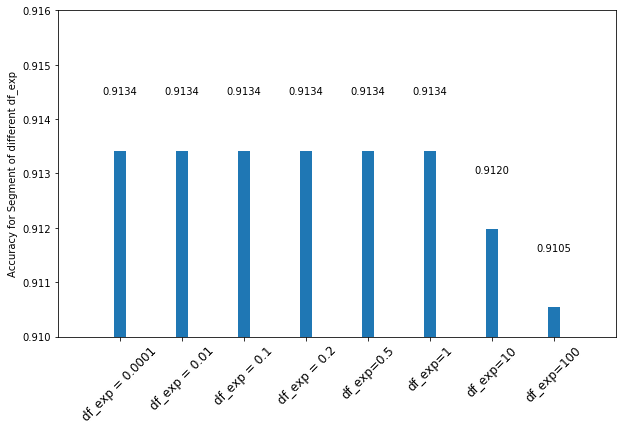

In [84]:
import pylab as pl
acc_seg_exp=[acc_seg_exp001[0],acc_seg_exp01[0],acc_seg_exp1[0],acc_seg[0],acc_seg_exp2[0],acc_seg_exp5[0], acc_seg_exp10[0],acc_seg_exp100[0]]
#round(acc_opt_exp, 4)
index=['df_exp = 0.0001','df_exp = 0.01','df_exp = 0.1',' df_exp = 0.2','df_exp=0.5','df_exp=1','df_exp=10','df_exp=100']#x轴的标签
#fig1 = plt.figure(1)
fig1 = plt.figure(figsize = (10,6))
ax1 = fig1.add_subplot(1, 1, 1)
x = np.arange(len(index))+1

plt.axis([0, 9, 0.91, 0.916])

ax1.bar(x, acc_seg_exp, width=0.2) #生成柱状图
ax1.set_xticks(x)
ax1.set_xticklabels(index, rotation=45, fontsize=12)

ax1.set_ylabel('Accuracy for Segment of different df_exp', fontsize=10)
#在柱状图上添加数字标签
for a, b in zip(x, acc_seg_exp):
    plt.text(a, b + 0.001, '%.4f' % b, ha='center', va='bottom', fontsize=10)
plt.show()

### Trend of accuracy when df_exp changing

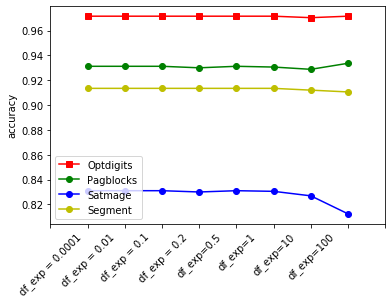

In [33]:
x = np.arange(len(index))+1 
k1 =acc_opt_exp 
k2 = acc_pag_exp 
k3 = acc_sat_exp
k4 = acc_seg_exp

plt.plot(x,k1,'s-',color = 'r',label="Optdigits")
plt.plot(x,k2,'o-',color = 'g',label="Pagblocks")
plt.plot(x,k3,'o-',color = 'b',label="Satmage")
plt.plot(x,k4,'o-',color = 'y',label="Segment")

index=['df_exp = 0.0001','df_exp = 0.01','df_exp = 0.1',' df_exp = 0.2','df_exp=0.5','df_exp=1','df_exp=10','df_exp=100']#x轴的标签

plt.xticks(np.arange(10), index, rotation=45)
plt.ylabel("accuracy")

plt.legend(loc = "best")
plt.show()

In [88]:
acc_opt_exp_ = np.zeros((1,len(np.arange(0.1, 10, 0.1))))
acc_pag_exp_ = np.zeros((1,len(np.arange(0.1, 10, 0.1))))
acc_sat_exp_ = np.zeros((1,len(np.arange(0.1, 10, 0.1))))
acc_seg_exp_ = np.zeros((1,len(np.arange(0.1, 10, 0.1))))
for df_exp in np.arange(0.1, 10, 0.1):
    i = (df_exp-0.1)*10
    acc_opt_exp_[:,int(i)] = test_df_exp(data_optdigits,df_exp)
    acc_pag_exp_[:,int(i)] = test_df_exp(data_pageblocks,df_exp)
    acc_sat_exp_[:,int(i)] = test_df_exp(data_satimage,df_exp)
    acc_seg_exp_[:,int(i)] = test_df_exp(data_segment,df_exp)

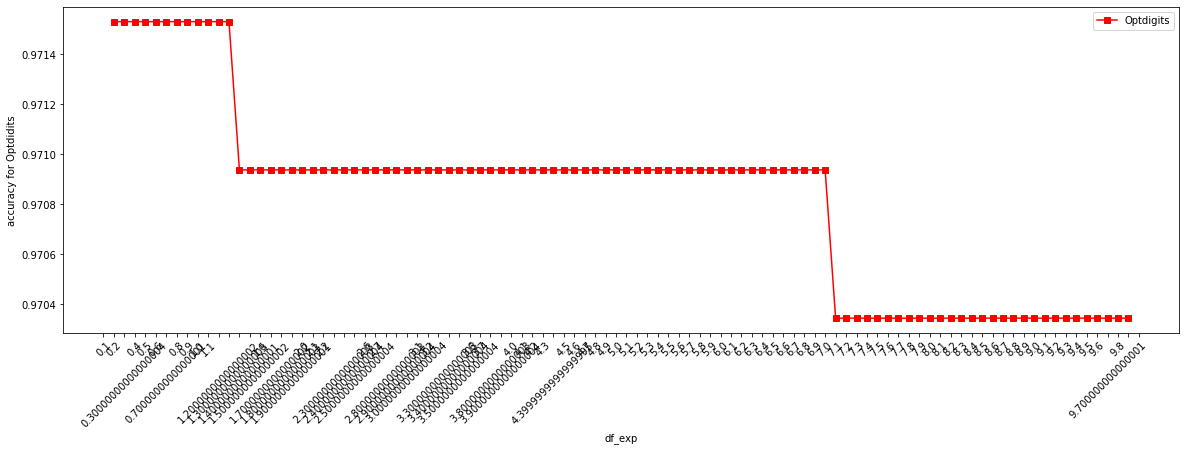

In [89]:
index_exp=np.arange(0.1,9.9,0.1)

x = np.arange(len(index_exp))+1 
k1 =acc_opt_exp_[0] 
k1 = k1[k1!=0]
plt.figure(figsize = (20,6))
plt.plot(x,k1,'s-',color = 'r',label="Optdigits")


plt.xticks(np.arange(100), index_exp, rotation=45)
plt.ylabel("accuracy for Optdidits")
plt.xlabel("df_exp")
plt.legend(loc = "best")
plt.show()

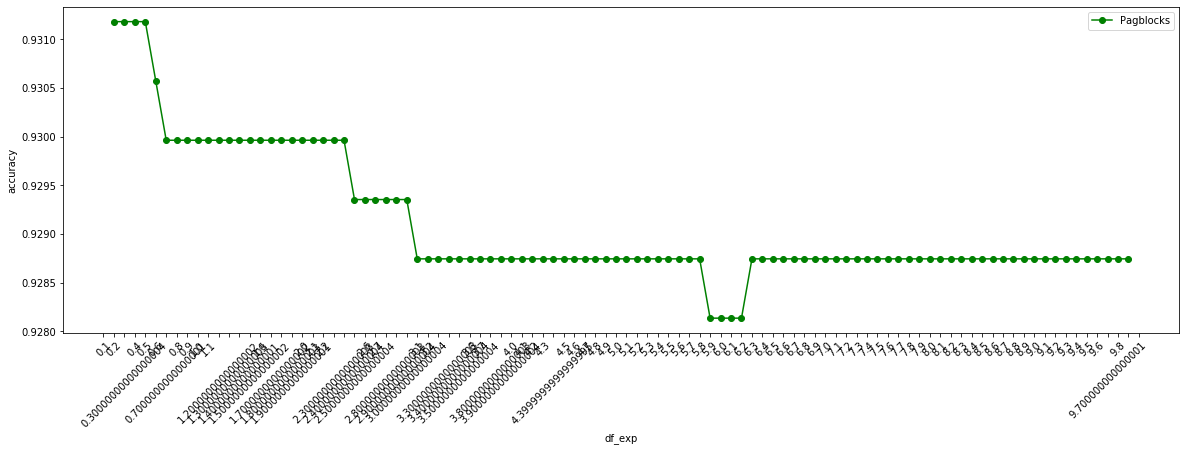

In [90]:
index_exp=np.arange(0.1,9.9,0.1)
x = np.arange(len(index_exp))+1
k2 = acc_pag_exp_[0] 

k2 = k2[k2!=0]

plt.figure(figsize = (20,6))
plt.plot(x,k2,'o-',color = 'g',label="Pagblocks")
plt.xticks(np.arange(100), index_exp, rotation=45)
plt.ylabel("accuracy")
plt.xlabel("df_exp")
plt.legend(loc = "best")
plt.show()

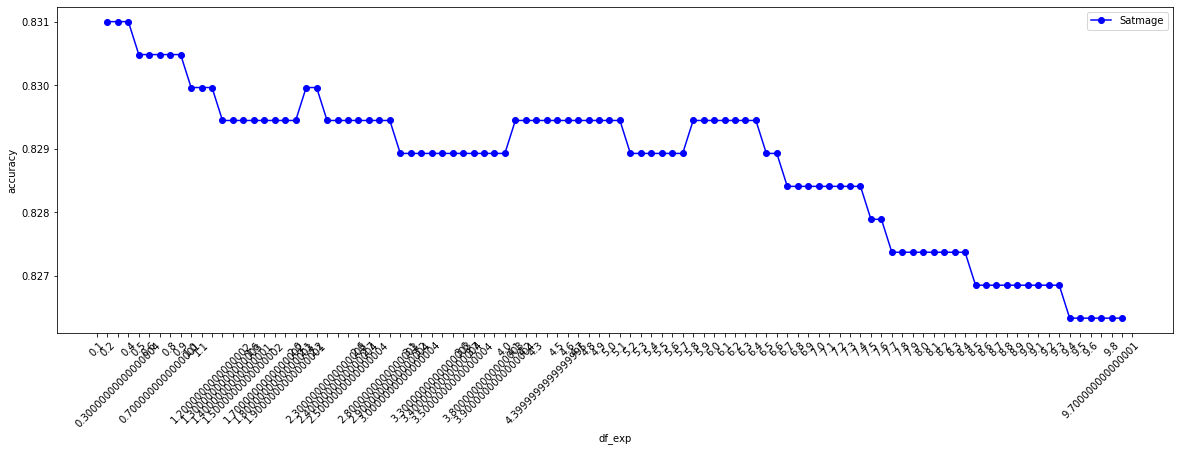

In [91]:
k3 = acc_sat_exp_[0]
k3 = k3[k3!=0]
plt.figure(figsize = (20,6))
plt.plot(x,k3,'o-',color = 'b',label="Satmage")
plt.xticks(np.arange(100), index_exp, rotation=45)
plt.ylabel("accuracy")#纵坐标名字
plt.xlabel("df_exp")
plt.legend(loc = "best")#图例
plt.show()

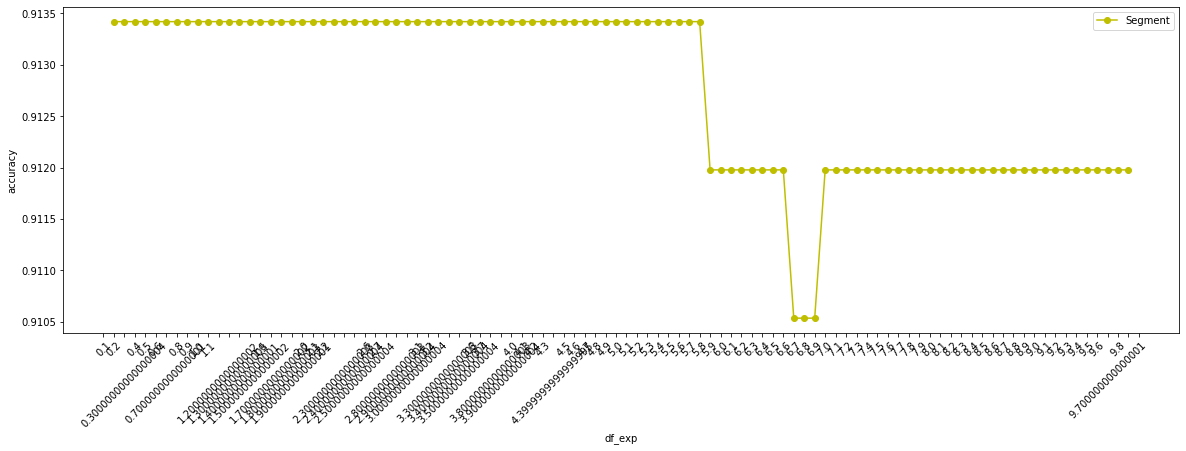

In [92]:
k4 = acc_seg_exp_[0]
k4 = k4[k4!=0]
plt.figure(figsize = (20,6))
plt.plot(x,k4,'o-',color = 'y',label="Segment")
plt.xticks(np.arange(100), index_exp, rotation=45)
plt.ylabel("accuracy")#纵坐标名字
plt.xlabel("df_exp")
plt.legend(loc = "best")#图例
plt.show()

## Test df_cov

### df_cov ≥ d − 1

### df_cov from d-1 to d+100 divided by 5

In [28]:
def test_df_cov(data,df):
    
    Xapp,Xtst,Zapp,Ztst,zapp,ztst = train_test(data)
    n,d,p,K,mprior,Sprior,df_exp,df_cov = coef(Xapp,Zapp)
    pi,mu,sig = params(Xapp, zapp, p, K,df_exp,mprior,Sprior,df_cov+df)
    prob, pred = prediction(Xtst,mu,sig,pi,K,p)
    
    acc = accuracy_score(ztst,pred)
    return[acc]

In [29]:
acc_opt_cov = np.zeros((1,len(np.arange(-2, 100, 5))))
acc_pag_cov = np.zeros((1,len(np.arange(-2, 100, 5))))
acc_sat_cov = np.zeros((1,len(np.arange(-2, 100, 5))))
acc_seg_cov = np.zeros((1,len(np.arange(-2, 100, 5))))
for df in np.arange(-2, 100, 5):
    i = (df+2)*0.2
    acc_opt_cov[:,int(i)] = test_df_cov(data_optdigits,df)
    acc_pag_cov[:,int(i)] = test_df_cov(data_pageblocks,df)
    acc_sat_cov[:,int(i)] = test_df_cov(data_satimage,df)
    acc_seg_cov[:,int(i)] = test_df_cov(data_segment,df)

In [59]:
print(acc_opt_cov)
print(acc_pag_cov)
print(acc_sat_cov)
print(acc_seg_cov)

[[0.97153025 0.97153025 0.97153025 0.97153025 0.97153025 0.97153025
  0.97153025 0.97153025 0.97153025 0.97153025 0.97153025 0.97153025
  0.97093713 0.97093713 0.97093713 0.97093713 0.97093713 0.97093713
  0.97093713 0.97093713 0.97093713]]
[[0.92996346 0.92996346 0.93118149 0.9317905  0.93300853 0.93361754
  0.93422655 0.93483557 0.93483557 0.93666261 0.93909866 0.93909866
  0.93909866 0.93909866 0.93970767 0.93970767 0.93970767 0.93909866
  0.93909866 0.93970767 0.94031669]]
[[0.82944531 0.83255573 0.83151892 0.83203733 0.83359253 0.83566615
  0.83670295 0.83670295 0.83825816 0.83877657 0.83670295 0.83670295
  0.83825816 0.83825816 0.83929497 0.84033178 0.84085018 0.84033178
  0.83877657 0.83929497 0.83877657]]
[[0.91341991 0.91341991 0.91341991 0.91341991 0.91341991 0.91341991
  0.91341991 0.91197691 0.91197691 0.91053391 0.91053391 0.91053391
  0.91053391 0.91053391 0.91053391 0.91197691 0.91197691 0.91197691
  0.91197691 0.91197691 0.91197691]]


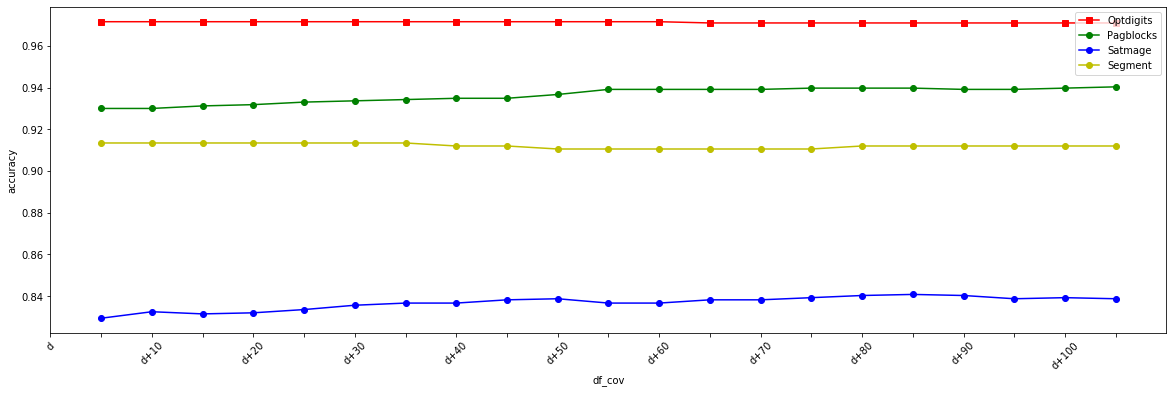

In [60]:
index_cov=['d','','d+10',' ','d+20',' ','d+30','','d+40',' ','d+50',' ','d+60',' ','d+70',' ','d+80',' ','d+90',' ','d+100']#x轴的标签

x = np.arange(len(index_cov))+1 #点的横坐标
k1 =acc_opt_cov[0] #线1的纵坐标
k2 = acc_pag_cov[0] #线2的纵坐标
k3 = acc_sat_cov[0]
k4 = acc_seg_cov[0]

plt.figure(figsize = (20,6))
plt.plot(x,k1,'s-',color = 'r',label="Optdigits")#s-:方形
plt.plot(x,k2,'o-',color = 'g',label="Pagblocks")#o-:圆形
plt.plot(x,k3,'o-',color = 'b',label="Satmage")
plt.plot(x,k4,'o-',color = 'y',label="Segment")


#plt.xlabel(index)#横坐标名字
plt.xticks(np.arange(22), index_cov, rotation=45)
plt.ylabel("accuracy")#纵坐标名字
plt.xlabel("df_cov")
plt.legend(loc = "best")#图例
plt.show()

### df_cov from d-1 to d+5000 divided by 50

In [30]:
acc_opt_cov1 = np.zeros((1,len(np.arange(-2, 5000, 50))))
acc_pag_cov1 = np.zeros((1,len(np.arange(-2, 5000, 50))))
acc_sat_cov1 = np.zeros((1,len(np.arange(-2, 5000, 50))))
acc_seg_cov1 = np.zeros((1,len(np.arange(-2, 5000, 50))))
for df in np.arange(-2, 5000, 50):
    i = (df+2)*0.02
    acc_opt_cov1[:,int(i)] = test_df_cov(data_optdigits,df)
    acc_pag_cov1[:,int(i)] = test_df_cov(data_pageblocks,df)
    acc_sat_cov1[:,int(i)] = test_df_cov(data_satimage,df)
    acc_seg_cov1[:,int(i)] = test_df_cov(data_segment,df)

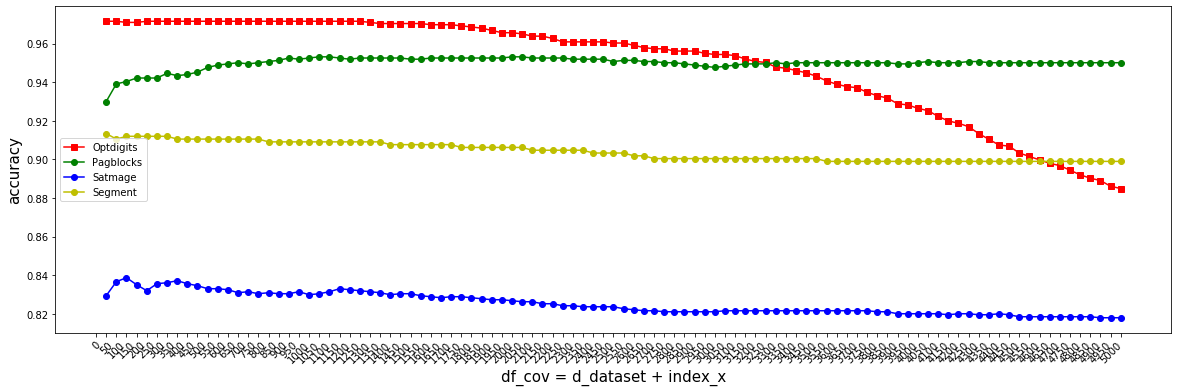

In [70]:
index_cov=range(0,5050,50)

x = np.arange(len(index_cov))+1 
k1 =acc_opt_cov1[0] 
k2 = acc_pag_cov1[0] 
k3 = acc_sat_cov1[0]
k4 = acc_seg_cov1[0]

plt.figure(figsize = (20,6))
plt.plot(x,k1,'s-',color = 'r',label="Optdigits")
plt.plot(x,k2,'o-',color = 'g',label="Pagblocks")
plt.plot(x,k3,'o-',color = 'b',label="Satmage")
plt.plot(x,k4,'o-',color = 'y',label="Segment")


plt.xticks(np.arange(102), index_cov, rotation=45)
plt.ylabel("accuracy",fontsize=15)
plt.xlabel("df_cov = d_dataset + index_x",fontsize=15)
plt.legend(loc = "best")
plt.show()

In [52]:
np.max(acc_opt_cov[0] )

0.9715302491103203

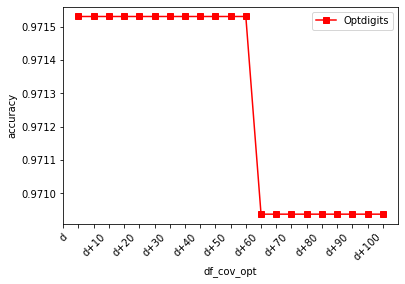

In [53]:
index_cov=['d','','d+10',' ','d+20',' ','d+30','','d+40',' ','d+50',' ','d+60',' ','d+70',' ','d+80',' ','d+90',' ','d+100']#x轴的标签

x = np.arange(len(index_cov))+1
k1 =acc_opt_cov[0] 


plt.plot(x,k1,'s-',color = 'r',label="Optdigits")


plt.xticks(np.arange(22), index_cov, rotation=45)
plt.ylabel("accuracy")
plt.xlabel("df_cov_opt")
plt.legend(loc = "best")
plt.show()

In [37]:
acc_pag_cov1 = np.zeros((1,len(np.arange(-2, 5000, 50))))
for df in np.arange(-2, 5000, 50):
    i = (df+2)*0.02

    acc_pag_cov1[:,int(i)] = test_df_cov(data_pageblocks,df)
    

In [38]:
np.max(acc_pag_cov[0])

0.9403166869671132

In [39]:
acc_pag_cov2 = test_df_cov(data_pageblocks,1000)
print(acc_pag_cov2)
acc_pag_cov3 = test_df_cov(data_pageblocks,5000)
print(acc_pag_cov3)
acc_pag_cov4 = test_df_cov(data_pageblocks,10000)
print(acc_pag_cov4)

[0.9524969549330086]
[0.9500609013398295]
[0.9482338611449452]


In [40]:
acc_pag_cov1.shape

(1, 101)

0.9531059683313033


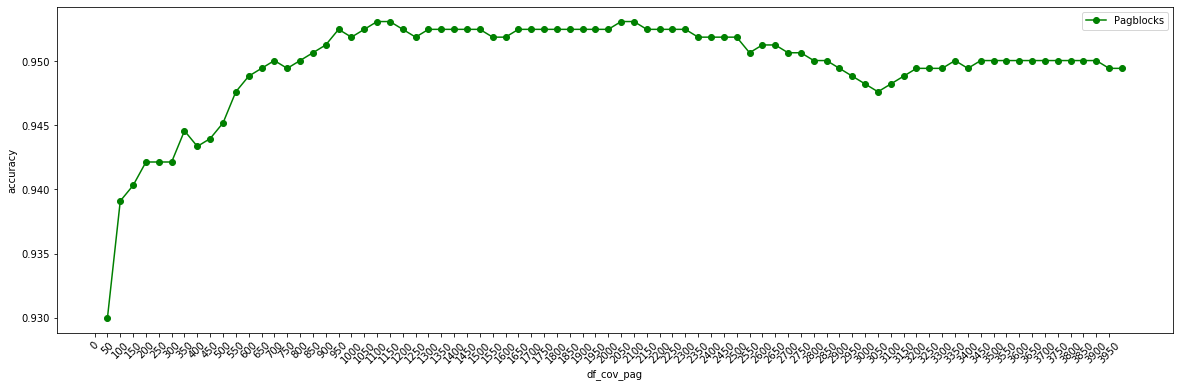

In [41]:
index_cov=range(0,4000,50)

x = np.arange(len(index_cov))+1 

k2 = acc_pag_cov1[0,:80] 
print(max(acc_pag_cov1[0]))
plt.figure(figsize = (20,6))

plt.plot(x,k2,'o-',color = 'g',label="Pagblocks")


plt.xticks(np.arange(80), index_cov, rotation=45)
plt.ylabel("accuracy")
plt.xlabel("df_cov_pag")
plt.legend(loc = "best")
plt.show()

In [42]:
#np.argwhere(prob[n,:]==np.max(prob[n,:])
#np.argwhere(acc_pag_cov1[0,:]==np.max(acc_pag_cov1[0]))
acc_pag_cov1 = np.zeros((1,len(np.arange(-2, 5000, 50))))
for df in np.arange(-2, 5000, 50):
    i = (df+2)*0.02

    acc_pag_cov1[:,int(i)] = test_df_cov(data_pageblocks,df)            
    if  np.max(acc_pag_cov1[:,int(i)])==0.9531059683313033 :
        print(i)
    else:
        continue
    ##df = d + 1052    

21.0
22.0
40.0
41.0


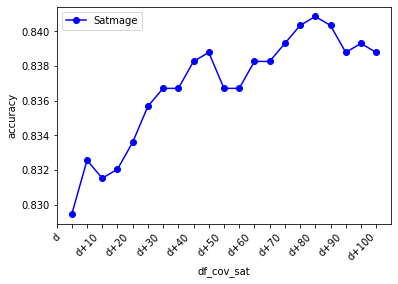

In [43]:
index_cov=['d','','d+10',' ','d+20',' ','d+30','','d+40',' ','d+50',' ','d+60',' ','d+70',' ','d+80',' ','d+90',' ','d+100']#x轴的标签

x = np.arange(len(index_cov))+1 
k3 = acc_sat_cov[0]
k4 = acc_seg_cov[0]

plt.plot(x,k3,'o-',color = 'b',label="Satmage")

plt.xticks(np.arange(22), index_cov, rotation=45)
plt.ylabel("accuracy")
plt.xlabel("df_cov_sat")
plt.legend(loc = "best")
plt.show()

In [51]:
np.max(acc_seg_cov[0])

0.9134199134199135

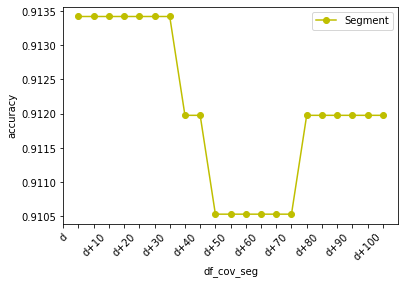

In [44]:
index_cov=['d','','d+10',' ','d+20',' ','d+30','','d+40',' ','d+50',' ','d+60',' ','d+70',' ','d+80',' ','d+90',' ','d+100']#x轴的标签

x = np.arange(len(index_cov))+1 

k4 = acc_seg_cov[0]
plt.plot(x,k4,'o-',color = 'y',label="Segment")


plt.xticks(np.arange(22), index_cov, rotation=45)
plt.ylabel("accuracy")
plt.xlabel("df_cov_seg")
plt.legend(loc = "best")
plt.show()

## Process with new df_exp and new df_cov

### set df_exp=0.1 and df_cov according to the best result of each dataset

In [48]:
pi_opt_new,mu_opt_new,sig_opt_new = params(Xapp_opt,zapp_opt,p_opt,K_opt,0.1,mprior_opt,Sprior_opt,d_opt+10) 
pi_pag_new,mu_pag_new,sig_pag_new = params(Xapp_pag, zapp_pag, p_pag, K_pag,0.1,mprior_pag,Sprior_pag,d_pag+1052) 
pi_sat_new,mu_sat_new,sig_sat_new = params(Xapp_sat, zapp_sat, p_sat, K_sat,0.1,mprior_sat,Sprior_sat,d_sat+85) 
pi_seg_new,mu_seg_new,sig_seg_new = params(Xapp_seg, zapp_seg, p_seg, K_seg,0.1,mprior_seg,Sprior_seg,d_seg-1)

prob_opt_new, pred_opt_new = prediction(Xtst_opt,mu_opt_new,sig_opt_new,pi_opt_new,K_opt,p_opt)
prob_pag_new, pred_pag_new = prediction(Xtst_pag,mu_pag_new,sig_pag_new,pi_pag_new,K_pag,p_pag)
prob_sat_new, pred_sat_new = prediction(Xtst_sat,mu_sat_new,sig_sat_new,pi_sat_new,K_sat,p_sat)
prob_seg_new, pred_seg_new = prediction(Xtst_seg,mu_seg_new,sig_seg_new,pi_seg_new,K_seg,p_seg)

In [49]:
acc_opt = accuracy_score(ztst_opt,pred_opt)
print('Accuracy for optdigits: ',acc_opt)
acc_opt_new = accuracy_score(ztst_opt,pred_opt_new)
print('Accuracy for optdigits after scaling: ',acc_opt)

acc_pag = accuracy_score(ztst_pag,pred_pag)
print('Accuracy for pagblocks: ',acc_pag)
acc_pag_new = accuracy_score(ztst_pag,pred_pag_new)
print('Accuracy for pageblocks after scaling : ',acc_pag_new )

acc_sat = accuracy_score(ztst_sat,pred_sat)
print('Accuracy for satimage: ',acc_sat)
acc_sat_new = accuracy_score(ztst_sat,pred_sat_new)
print('Accuracy for satimage after scaling : ',acc_sat_new)

acc_seg = accuracy_score(ztst_seg,pred_seg)
print('Accuracy for segment: ',acc_seg)
acc_seg_new = accuracy_score(ztst_seg,pred_seg_new)
print('Accuracy for segment after scaling: ',acc_seg_new)

Accuracy for optdigits:  0.9715302491103203
Accuracy for optdigits after scaling:  0.9715302491103203
Accuracy for pagblocks:  0.9299634591961023
Accuracy for pageblocks after scaling :  0.9531059683313033
Accuracy for satimage:  0.8299637117677553
Accuracy for satimage after scaling :  0.8408501814411612
Accuracy for segment:  0.9134199134199135
Accuracy for segment after scaling:  0.9134199134199135


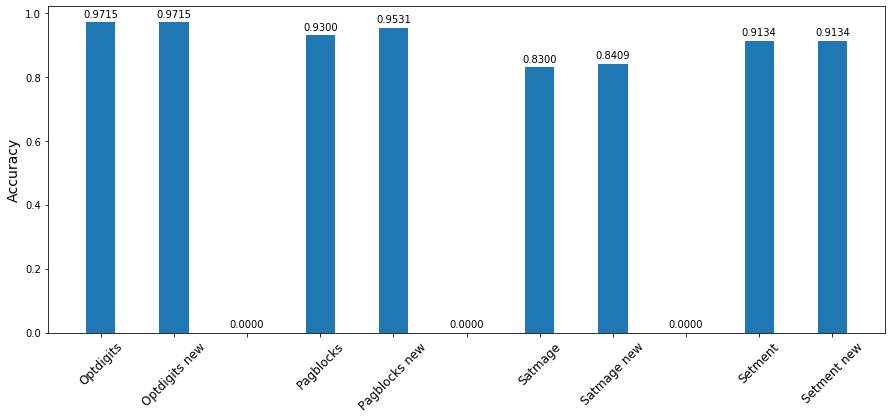

In [50]:
import pylab as pl
acc=[acc_opt,acc_opt_new, 0, acc_pag,acc_pag_new,0, acc_sat,acc_sat_new,0, acc_seg,acc_seg_new]#各变量IV
#print(ivlist)
index=['Optdigits','Optdigits new','   ','Pagblocks','Pagblocks new','   ','Satmage','Satmage new','   ','Setment','Setment new']#x轴的标签
#fig1 = plt.figure(1)
fig1 = plt.figure(figsize = (15,6))
ax1 = fig1.add_subplot(1, 1, 1)
x = np.arange(len(index))+1
ax1.bar(x, acc,  width=0.4) #生成柱状图
ax1.set_xticks(x)
ax1.set_xticklabels(index, rotation=45, fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=14)
#在柱状图上添加数字标签
for a, b in zip(x, acc):
    plt.text(a, b + 0.01, '%.4f' % b, ha='center', va='bottom', fontsize=10)
plt.show()